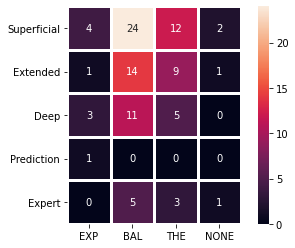

In [2]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [3]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [4]:
# import the yr1c1c1 labels
dir_csv = 'outputs/labels_cleaned_y1c1c2.csv'
df = pd.read_csv(dir_csv, encoding='utf-8')

In [5]:
# -- Bag of Words ---
wordvec_names, wordvec_counts= ml_tools.BoW(df['Content'].tolist())
y_b = df['ReasoningLevel'].tolist()

# -- Feature extraction: TF-IDF ---
X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))
X_t = X_t[1]
y_t = df['ReasoningLevel'].tolist()

<ipython-input-5-d71189f87b28>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_t = np.array(ml_tools.tf_idf(df['Content'].tolist()))


In [6]:
# BOW
# coding the labels so easily interpretable by the computer
lb = LabelBinarizer()
lb.fit(y_b)
y_b = lb.transform(y_b)

# TF-IDF
# --- one hot encoding - using labelbinarrizer as it does not require labels to be integers
lb = LabelBinarizer()
lb.fit(y_t)
y_t = lb.transform(y_t)


In [7]:
# code reference
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [8]:
# prepare for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EfiaA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df['Content'].tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['atom', 'atomic', 'number', 'vacuum', 'permittivity', 'electron', 'mass', 'charge', 'electron', 'divide', 'eq', 'eq', 'potential', 'kinetic', 'energy', 'electron', 'respectively', 'since', 'energy', 'photon', 'emit', 'hydrogen', 'atom', 'give', 'difference', 'two', 'hydrogen', 'energy', 'level', 'positive']


In [10]:
#create 

id2word = corpora.Dictionary(data_words)

#create corpus
texts = data_words

#Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

#View 
print(corpus[:1][0][:30])

[(0, 2), (1, 3), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 4), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 7), (27, 8), (28, 1), (29, 1)]


In [11]:
#LDA model training 
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"value" + 0.017*"line" + 0.015*"light" + 0.013*"grate" + '
  '0.012*"constant" + 0.011*"wavelength" + 0.010*"slit" + 0.010*"hydrogen" + '
  '0.009*"error" + 0.009*"order"'),
 (1,
  '0.020*"wavelength" + 0.019*"error" + 0.018*"value" + 0.018*"light" + '
  '0.017*"rydberg" + 0.016*"line" + 0.016*"constant" + 0.014*"grate" + '
  '0.014*"energy" + 0.011*"hydrogen"'),
 (2,
  '0.018*"value" + 0.018*"wavelength" + 0.016*"line" + 0.013*"error" + '
  '0.013*"constant" + 0.013*"grate" + 0.012*"light" + 0.012*"spectrometer" + '
  '0.010*"energy" + 0.010*"lamp"'),
 (3,
  '0.020*"line" + 0.020*"grate" + 0.019*"value" + 0.017*"error" + '
  '0.015*"light" + 0.014*"rydberg" + 0.014*"wavelength" + 0.013*"hydrogen" + '
  '0.012*"constant" + 0.009*"lamp"'),
 (4,
  '0.023*"value" + 0.017*"constant" + 0.017*"light" + 0.016*"wavelength" + '
  '0.014*"grate" + 0.011*"error" + 0.011*"line" + 0.010*"rydberg" + '
  '0.010*"hydrogen" + 0.009*"calculate"'),
 (5,
  '0.017*"grate" + 0.017*"value" + 0.

In [12]:
%pip install pyLDAvis==2.1.2
import pickle 
import pyLDAvis
from pyLDAvis import gensim
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(dir_name_e+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, dir_name_e + str(num_topics) +'.html')
LDAvis_prepared

Note: you may need to restart the kernel to use updated packages.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.010478  0.003243       1        1  45.596138
1     -0.007737 -0.003312       2        1  18.814912
7     -0.005495  0.002374       3        1  14.570068
3     -0.003159 -0.002470       4        1  13.643820
8     -0.000886 -0.006172       5        1   3.727104
9     -0.003852  0.004714       6        1   3.427664
4      0.004471  0.000327       7        1   0.188193
2      0.004562 -0.000426       8        1   0.010701
5      0.009160 -0.000865       9        1   0.010700
0      0.013414  0.002586      10        1   0.010700, topic_info=            Term         Freq        Total Category  logprob  loglift
159        value  1578.000000  1578.000000  Default  30.0000  30.0000
89          line  1753.000000  1753.000000  Default  29.0000  29.0000
164   wavelength  1568.000000  1568.000000  Default  28.0000  28.0000
26      constant  1429.000000  1429.000000  Default  27.0000  27.0000
88         light  1406.000000  1406.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
41   diffraction     0.054035   724.749656  Topic10  -5.1693  -0.3613
129       result     0.046658   542.312822  Topic10  -5.3161  -0.2181
299  measurement     0.042685   508.338914  Topic10  -5.4051  -0.2424
68          give     0.041639   441.494386  Topic10  -5.4299  -0.1262
155  uncertainty     0.042793   570.090175  Topic10  -5.4025  -0.3545

[815 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1539      1  0.644162    abstract
1648      1  0.468320  acceptable
3494      1  0.389397  accidental
3494      2  0.389397  accidental
3494      4  0.389397  accidental
...     ...       ...         ...
2568      4  0.137134          𝑛𝑚
2568      5  0.137134          𝑛𝑚
2680      1  0.818733         𝑟𝑒𝑑
2680      2  0.204683         𝑟𝑒𝑑
2681      1  0.608002          𝜋𝜖

[1295 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 8, 4, 9, 10, 5, 3, 6, 1])

In [13]:
# bag of words
count = 0
for k,v in id2word.iteritems():
    print(k,v)
    count +=1
    if count > 10:
        break

0 add
1 affected
2 air
3 align
4 also
5 although
6 analysis
7 angle
8 angular
9 atom
10 atomic


c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
id2word.filter_extremes(no_below=12,no_above=0.5, keep_n = 100000)

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
bow_corpus = [id2word.doc2bow(doc) for doc in data_words]

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
bow_doc_95 = bow_corpus[94]
for i in range(len(bow_doc_95)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_95[i][0], 
                                               id2word[bow_doc_95[i][0]], 
bow_doc_95[i][1]))

Word 0 ("add") appears 2 time.
Word 1 ("affected") appears 1 time.
Word 5 ("angular") appears 2 time.
Word 6 ("atomic") appears 1 time.
Word 7 ("background") appears 3 time.
Word 9 ("charge") appears 1 time.
Word 10 ("conclude") appears 3 time.
Word 11 ("crosshair") appears 8 time.
Word 12 ("dark") appears 1 time.
Word 16 ("directly") appears 1 time.
Word 19 ("ensure") appears 3 time.
Word 21 ("factor") appears 2 time.
Word 22 ("fall") appears 1 time.
Word 23 ("form") appears 4 time.
Word 26 ("gas") appears 5 time.
Word 27 ("get") appears 2 time.
Word 28 ("great") appears 1 time.
Word 31 ("improve") appears 1 time.
Word 36 ("negligible") appears 1 time.
Word 46 ("reference") appears 1 time.
Word 49 ("room") appears 2 time.
Word 50 ("since") appears 8 time.
Word 51 ("size") appears 3 time.
Word 52 ("still") appears 3 time.
Word 56 ("tube") appears 1 time.
Word 59 ("various") appears 6 time.
Word 62 ("able") appears 1 time.
Word 65 ("allows") appears 1 time.
Word 69 ("appear") appears 1 

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.12215063460721136),
 (1, 0.2836266993469877),
 (2, 0.0889844357418732),
 (3, 0.056010480109643705),
 (4, 0.056010480109643705),
 (5, 0.06848905698288577),
 (6, 0.12215063460721136),
 (7, 0.056010480109643705),
 (8, 0.07464619645962134),
 (9, 0.12570577621416076),
 (10, 0.2758142358418476),
 (11, 0.06655689402325103),
 (12, 0.06848905698288577),
 (13, 0.09750516333996509),
 (14, 0.056010480109643705),
 (15, 0.1276322113268567),
 (16, 0.09170542394088194),
 (17, 0.0889844357418732),
 (18, 0.06467916549276304),
 (19, 0.04834053913562069),
 (20, 0.1108808594728049),
 (21, 0.07683180061731812),
 (22, 0.06848905698288577),
 (23, 0.04690704399900591),
 (24, 0.07683180061731812),
 (25, 0.3073272024692725),
 (26, 0.11531273017079026),
 (27, 0.0593439224318604),
 (28, 0.05283583465773499),
 (29, 0.1108808594728049),
 (30, 0.10727701128364754),
 (31, 0.10880851779739188),
 (32, 0.11469075096292763),
 (33, 0.05440425889869594),
 (34, 0.26514374972004234),
 (35, 0.10260693871984645),
 (36, 0

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
%pip install pyLDAvis==2.1.2
import pickle 
import pyLDAvis
from pyLDAvis import gensim
from gensim.models.ldamulticore import LdaMulticore

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
lda_model = LdaMulticore(bow_corpus, num_topics=10, id2word=id2word, passes=2, workers=2)

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"pattern" + 0.012*"fringe" + 0.012*"experimental" + 0.011*"resolution" + 0.010*"great" + 0.008*"model" + 0.007*"appear" + 0.007*"centre" + 0.007*"element" + 0.007*"interference"
Topic: 1 
Words: 0.016*"wire" + 0.014*"orbit" + 0.012*"angular" + 0.011*"thus" + 0.009*"model" + 0.009*"air" + 0.008*"free" + 0.008*"violet" + 0.008*"quantum" + 0.008*"green"
Topic: 2 
Words: 0.016*"fringe" + 0.016*"purple" + 0.015*"thus" + 0.011*"discrete" + 0.009*"angular" + 0.008*"crosshair" + 0.008*"gas" + 0.006*"precisely" + 0.006*"may" + 0.006*"violet"
Topic: 3 
Words: 0.042*"fringe" + 0.012*"element" + 0.010*"quantum" + 0.009*"centre" + 0.009*"crosshair" + 0.009*"model" + 0.008*"around" + 0.007*"orbit" + 0.007*"experimental" + 0.007*"radius"
Topic: 4 
Words: 0.016*"violet" + 0.012*"accuracy" + 0.009*"angular" + 0.009*"able" + 0.009*"crosshair" + 0.008*"linear" + 0.007*"thus" + 0.007*"accurately" + 0.007*"atomic" + 0.007*"since"
Topic: 5 
Words: 0.011*"purple" + 0.009*"centre" + 0.0

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
lda_model_tfidf = LdaMulticore(corpus_tfidf, num_topics=10, id2word= id2word, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.011*"fringe" + 0.007*"electromagnetic" + 0.006*"python" + 0.006*"bright" + 0.006*"nth" + 0.005*"must" + 0.005*"percentage" + 0.005*"radiation" + 0.005*"slope" + 0.005*"sinθ"
Topic: 1 Word: 0.006*"hence" + 0.006*"sure" + 0.006*"orbit" + 0.005*"resolution" + 0.005*"compare" + 0.005*"quantum" + 0.005*"side" + 0.005*"apparatus" + 0.005*"orbital" + 0.005*"assume"
Topic: 2 Word: 0.008*"purple" + 0.006*"inverse" + 0.006*"wire" + 0.006*"slope" + 0.005*"clearly" + 0.005*"setup" + 0.005*"spread" + 0.005*"angular" + 0.005*"crosshair" + 0.005*"true"
Topic: 3 Word: 0.007*"purple" + 0.007*"component" + 0.007*"violet" + 0.006*"crosshair" + 0.006*"emits" + 0.006*"compose" + 0.005*"get" + 0.005*"interference" + 0.005*"mechanic" + 0.005*"constructive"
Topic: 4 Word: 0.007*"violet" + 0.006*"theoretical" + 0.006*"fringe" + 0.006*"aqua" + 0.006*"becomes" + 0.005*"section" + 0.005*"hence" + 0.005*"sufficient" + 0.005*"theory" + 0.005*"front"
Topic: 5 Word: 0.008*"aqua" + 0.007*"fringe" + 0.

In [39]:
for index, score in sorted(lda_model[bow_corpus[94]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9975536465644836	 
Topic: 0.016*"violet" + 0.012*"accuracy" + 0.009*"angular" + 0.009*"able" + 0.009*"crosshair" + 0.008*"linear" + 0.007*"thus" + 0.007*"accurately" + 0.007*"atomic" + 0.007*"since"


c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#performance evaluation by classifying sample document using LDA TF-IDF model
for index, score in sorted(lda_model_tfidf[bow_corpus[94]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8018959760665894	 
Topic: 0.008*"aqua" + 0.007*"fringe" + 0.006*"hair" + 0.006*"arcminute" + 0.006*"violet" + 0.005*"period" + 0.005*"main" + 0.005*"green" + 0.005*"drop" + 0.005*"reference"

Score: 0.19592922925949097	 
Topic: 0.006*"hence" + 0.006*"sure" + 0.006*"orbit" + 0.005*"resolution" + 0.005*"compare" + 0.005*"quantum" + 0.005*"side" + 0.005*"apparatus" + 0.005*"orbital" + 0.005*"assume"


c:\Users\EfiaA\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Our test document has the highest probability to be part of the topic
# that our model assigned, which is the accurate classification